#    데이터 준비
파이토치에서는 데이터 준비를 위해 torch.utils.data의 Dataset과 DataLoader 사용 가능
*    Dataset에는 다양한 데이터 셋이 존재(MNIST, FashionMNIST,CIFAR10 ...)

  *   Vision Dataset : http://pytorch.org/vision/stable/datasets.html
  *   Text Dataset : http://pytorch.org/text/stable/datasets.html
  *   Audio Dataset : http://pytorch.org/audio/stable/datasets.html

*    DataLoader와 Dataset을 통해 batch_size, train 여부, transform 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해 줄 수 있음


In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
import torch

토치비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지


*   transforms : 전처리 할 때 사용하는 메소드(http://pytorch.org/docs/stable/torchvision/transforms.html)
*   transforms에서 제공하는 클래스이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행



In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets

DataLoder의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행
ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [ ]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,),std=(1.0,))]) # 평균 0.5, 표준편차 1로 노말라이제이션해줘

In [ ]:
trainset = datasets.MNIST(root='/content/',
                          train=True,download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root='/content/',
                          train=False,download=True,
                          transform=mnist_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 108955022.57it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 10231055.22it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45385523.11it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21550371.91it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터를 가져옴

In [ ]:
train_loader = DataLoader(trainset, batch_size=8,shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8,shuffle=True, num_workers=2)

In [ ]:
dataiter = iter(train_loader)
images, labels =next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [ ]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

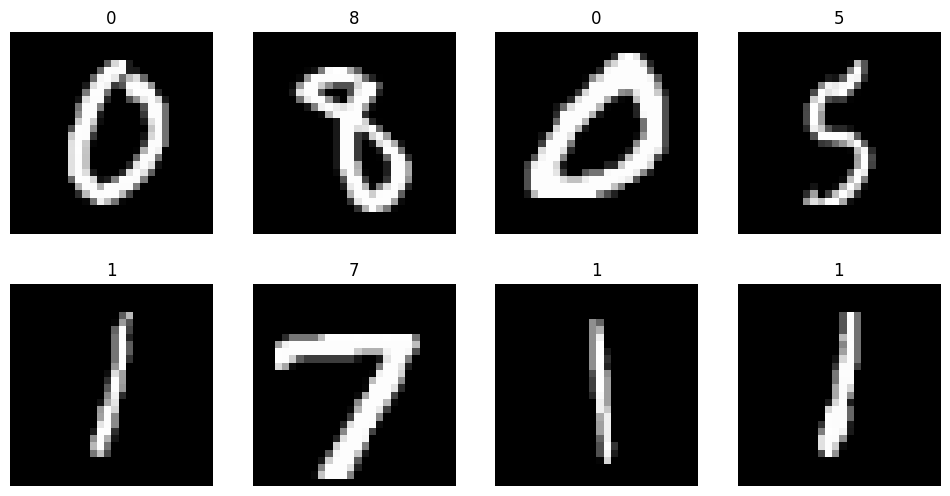

In [ ]:
import matplotlib.pyplot as plt

figure= plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1, cols * rows + 1) :
  sample_idx = torch.randint(len(trainset), size=(1,)).item()

  img, label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()